# Tutorial: The Neocortical Microcircuit Collaboration Portal

The Neocortical Microcircuit Collaboration Portal (NMC Portal, at [https://bbp.epfl.ch/nmc-portal](https://bbp.epfl.ch/nmc-portal)) provides an online public resource of the Blue Brain Project's first release of a digital reconstruction of the microcircuitry of juvenile Rat somatosensory cortex, access to experimental data sets used in the reconstruction, and the resulting single cell models.

![NMC Portal web page](NMCWeb.png)

In this tutorial we will focus on working with the electrical models of single neurons one can download from the NMC portal.

Let's begin with importing useful Python packages

In [12]:
%matplotlib inline
import matplotlib.pyplot as pyplot

import os
import zipfile # Extract zip files
import urllib # Download files from the web
import neurom # Analyse / view morphologies
import neurom.viewer

import neuron as nrn # NEURON simulator

We can select a model from the NMC Portal, and download the zip file containing the code of the model:

In [11]:
urllib.urlretrieve('https://bbp.epfl.ch/nmc-portal/documents/10184/1921755/L5_TTPC2_cADpyr232_1.zip/a058fc9c-6c67-417b-a65b-20742902ccbb','L5PC.zip');

Then we extract this zip file on disk:

In [4]:
import os, zipfile
with zipfile.ZipFile('L5PC.zip', 'r') as zip_file:
    zip_file.extractall('.')
os.chdir('L5_TTPC2_cADpyr232_1')

The model contains MOD files describing the NEURON simulator mechanisms used in the model. As we have seen in another tutorial, one can compile these files using the 'nrnivmodl' command:

In [5]:
!nrnivmodl mechanisms

/Users/werner/src/MOOC-SingleCell-2017/NMCPortal/L5_TTPC2_cADpyr232_1
mechanisms/CaDynamics_E2.mod mechanisms/Ca_HVA.mod mechanisms/Ca_LVAst.mod mechanisms/Ih.mod mechanisms/Im.mod mechanisms/K_Pst.mod mechanisms/K_Tst.mod mechanisms/NaTa_t.mod mechanisms/NaTs2_t.mod mechanisms/Nap_Et2.mod mechanisms/ProbAMPANMDA_EMS.mod mechanisms/ProbGABAAB_EMS.mod mechanisms/SK_E2.mod mechanisms/SKv3_1.mod
CaDynamics_E2.mod Ca_HVA.mod Ca_LVAst.mod Ih.mod Im.mod K_Pst.mod K_Tst.mod NaTa_t.mod NaTs2_t.mod Nap_Et2.mod ProbAMPANMDA_EMS.mod ProbGABAAB_EMS.mod SK_E2.mod SKv3_1.mod
"/Users/werner/local/nrnnogui/x86_64/bin/nocmodl" CaDynamics_E2
Translating CaDynamics_E2.mod into CaDynamics_E2.c
Thread Safe
"/Users/werner/local/nrnnogui/share/nrn/libtool"  --mode=compile gcc -DHAVE_CONFIG_H  -I. -I.. -I"/Users/werner/local/nrnnogui/include/nrn" -I"/Users/werner/local/nrnnogui/x86_64/lib"      -g -O2 -c -o CaDynamics_E2.lo `test -f 'CaDynamics_E2.c' || echo '/'`CaDynamics_E2.c
libtool: compile:  gcc -DHAVE_C

"/Users/werner/local/nrnnogui/x86_64/bin/nocmodl" SK_E2
Translating SK_E2.mod into SK_E2.c
Thread Safe
"/Users/werner/local/nrnnogui/share/nrn/libtool"  --mode=compile gcc -DHAVE_CONFIG_H  -I. -I.. -I"/Users/werner/local/nrnnogui/include/nrn" -I"/Users/werner/local/nrnnogui/x86_64/lib"      -g -O2 -c -o SK_E2.lo `test -f 'SK_E2.c' || echo '/'`SK_E2.c
libtool: compile:  gcc -DHAVE_CONFIG_H -I. -I.. -I/Users/werner/local/nrnnogui/include/nrn -I/Users/werner/local/nrnnogui/x86_64/lib -g -O2 -c SK_E2.c  -fno-common -DPIC -o .libs/SK_E2.o
"/Users/werner/local/nrnnogui/x86_64/bin/nocmodl" SKv3_1
Translating SKv3_1.mod into SKv3_1.c
Thread Safe
"/Users/werner/local/nrnnogui/share/nrn/libtool"  --mode=compile gcc -DHAVE_CONFIG_H  -I. -I.. -I"/Users/werner/local/nrnnogui/include/nrn" -I"/Users/werner/local/nrnnogui/x86_64/lib"      -g -O2 -c -o SKv3_1.lo `test -f 'SKv3_1.c' || echo '/'`SKv3_1.c
libtool: compile:  gcc -DHAVE_CONFIG_H -I. -I.. -I/Users/werner/local/nrnnogui/include/nrn -I/Users/w

The morphology of the cell is located in the 'morphology' subdirectory. 
We can visualize this morpholohy using NeuroM:

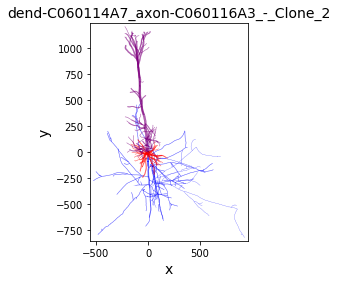

In [10]:
neurom.viewer.draw(neurom.load_neuron('morphology/dend-C060114A7_axon-C060116A3_-_Clone_2.asc'));

To load the functionality of the electrical model we load the 'init.hoc' HOC file.

In [14]:
nrn.h.load_file("./init.hoc");

The init.hoc has, among other, created a function 'create_cell' to instantiate the neuron in the NEURON simulator. As argument it takes a value to enable/disable the synapses of the cell. (1=True, 0=False)

In [18]:
nrn.h.create_cell(1);        #argument 1 stands for 'load synapses'

After this function has been called the global name space of the NEURON simulator contains a variable 'cell'. 
Let's create a python variable to point to this object:

In [20]:
cell = nrn.h.cell
soma = cell.soma[0]

Now that we have a pointer to the soma of the neuron, we can inject a current into it. As we've learned in another tutorial, we can create an IClamp to inject the current:

In [21]:
stimulus = nrn.h.IClamp(0.5, sec=soma)
stimulus.dur = 2000 # ms
stimulus.delay = 300  # ms     
stimulus.amp = 0.69 # nA

The init.hoc also has provided us with a function to enable the recording of the voltage

In [23]:
nrn.h.create_recording();    #activate recording of activity 

Now we can run the simulation.

In [ ]:
nrn.h.tstop = 2600
nrn.h.dt = 0.05
nrn.h.run()

nrn.h.save_recording()

And plot the time/voltage

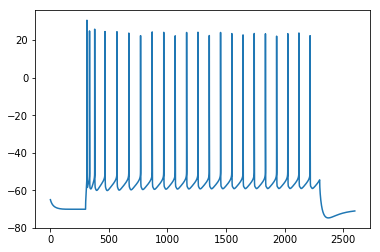

In [26]:
time = nrn.h.time
voltage = nrn.h.voltage

pyplot.plot(time, voltage);

In [11]:
with open('synapses/mtype_map.tsv') as mtype_map_file:
    mtype_map_content = mtype_map_file.read()
print mtype_map_content

0	L1_DAC
1	L1_NGC-DA
2	L1_NGC-SA
3	L1_HAC
4	L1_DLAC
5	L1_SLAC
6	L23_PC
7	L23_MC
8	L23_BTC
9	L23_DBC
10	L23_BP
11	L23_NGC
12	L23_LBC
13	L23_NBC
14	L23_SBC
15	L23_ChC
16	L4_PC
17	L4_SP
18	L4_SS
19	L4_MC
20	L4_BTC
21	L4_DBC
22	L4_BP
23	L4_NGC
24	L4_LBC
25	L4_NBC
26	L4_SBC
27	L4_ChC
28	L5_TTPC1
29	L5_TTPC2
30	L5_UTPC
31	L5_STPC
32	L5_MC
33	L5_BTC
34	L5_DBC
35	L5_BP
36	L5_NGC
37	L5_LBC
38	L5_NBC
39	L5_SBC
40	L5_ChC
41	L6_TPC_L1
42	L6_TPC_L4
43	L6_UTPC
44	L6_IPC
45	L6_BPC
46	L6_MC
47	L6_BTC
48	L6_DBC
49	L6_BP
50	L6_NGC
51	L6_LBC
52	L6_NBC
53	L6_SBC
54	L6_ChC



In [12]:
mtype_map = {}
for line in mtype_map_content.split('\n')[:-1]:
    n, mtype = line.split()
    mtype_map[mtype] = int(n)
    
print mtype_map['L23_PC']


6


In [13]:
for i in range(0, int(cell.synapses.n_of_mtypes)):
    cell.synapses.were_active_pre_mtypes.x[i]=0
    cell.synapses.active_pre_mtypes.x[i] = 0

cell.synapses.active_pre_mtypes.x[mtype_map['L23_PC']] = 1
    
cell.synapses.update_synapses(nrn.h.synapse_plot) 

0.0

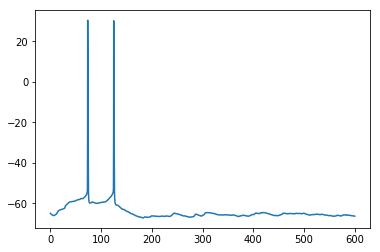

In [14]:
if 'stimulus' in locals():
    del stimulus

nrn.h.tstop = 600
nrn.h.dt = 0.05

nrn.h.run()
nrn.h.save_recording()

pyplot.plot(nrn.h.time, nrn.h.voltage)

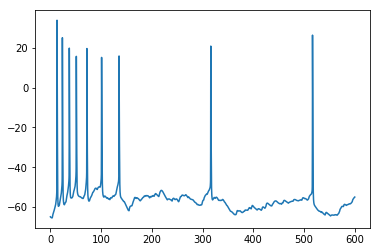

In [15]:
for i in range(0, int(cell.synapses.n_of_mtypes)):
    cell.synapses.were_active_pre_mtypes.x[i]=0
    cell.synapses.active_pre_mtypes.x[i] = 0

cell.synapses.active_pre_mtypes.x[mtype_map['L5_TTPC2']] = 1
    
cell.synapses.update_synapses(nrn.h.synapse_plot) 

if 'stimulus' in locals():
    del stimulus

nrn.h.tstop = 600
nrn.h.dt = 0.05

nrn.h.run()
nrn.h.save_recording()

pyplot.plot(nrn.h.time, nrn.h.voltage)

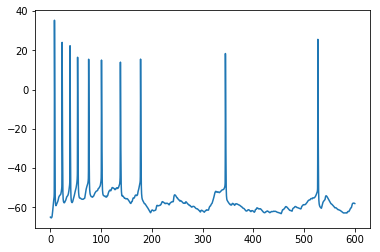

In [16]:
for i in range(0, int(cell.synapses.n_of_mtypes)):
    cell.synapses.were_active_pre_mtypes.x[i]=0
    cell.synapses.active_pre_mtypes.x[i] = 0

cell.synapses.active_pre_mtypes.x[mtype_map['L5_TTPC2']] = 1
cell.synapses.active_pre_mtypes.x[mtype_map['L4_MC']] = 1



cell.synapses.update_synapses(nrn.h.synapse_plot) 

if 'stimulus' in locals():
    del stimulus

nrn.h.tstop = 600
nrn.h.dt = 0.05

nrn.h.run()
nrn.h.save_recording()

pyplot.plot(nrn.h.time, nrn.h.voltage)

List[5592]


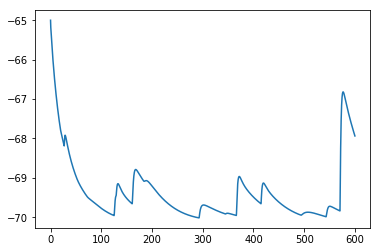

In [28]:
for i in range(0, int(cell.synapses.n_of_mtypes)):
    cell.synapses.were_active_pre_mtypes.x[i]=0
    cell.synapses.active_pre_mtypes.x[i] = 0

cell.synapses.active_pre_mtypes.x[mtype_map['L5_TTPC2']] = 0
cell.synapses.update_synapses(nrn.h.synapse_plot) 

pre_mtype_netstims = list(cell.synapses.pre_mtype_netstimlists)

print pre_mtype_netstims[mtype_map['L5_TTPC2']]
for netstims in pre_mtype_netstims:
    for netstim in netstims: #pre_mtype_netstims[mtype_map['L5_TTPC2']]:
        netstim.interval = 10000


if 'stimulus' in locals():
    del stimulus

nrn.h.tstop = 600
nrn.h.dt = 0.05

nrn.h.run()
nrn.h.save_recording()

pyplot.plot(nrn.h.time, nrn.h.voltage)